# Objets connectés

Les objets connectés, [des robots dans nos maisons](http://lienmini.fr/3389-701) ?

L'impact de la robotisation [dans les magasins](http://lienmini.fr/3389-707)

Question déclencheante : *" Si on dispose d'un employé et d'un robot. Faut il confier une tâche répétitive et fastidieuse à l'un ou à l'autre pour qu'elle soit correctement réalisée ? "*

Nous allons parler d'un certain type de robot appelés : les systèmes embarqués. Les connaissances de technologies sur la fabrication de robots est un prérequis pour comprendre ce cours.

Comment utiliser un microcontrôleur pour automatiser une tâche de caractérisation ? Dans le cas d’une série de résistors, cette tâche est particulièrement fastidieuse et il sera impossible de la reproduire à l’identique en changeant le manipulateur, un robot testeur doit donc être conçu pour relever le défi et permettre à tous de travailler en équipe.

## A) Géneralités

## 1) Les systèmes informatiques embarqués

Un système informatique embarqué est intégré à un objet. Il contrôle les entrées et les sorties de celui-ci grâce à ses composants, dont les principaux sont :
- La carte programmable
- Les capteurs
- Les actionneurs
Il est destiné à piloter l'objet à distance (en faisant remonter des informations sur le cloud) ou de manière autonome (grâce à des algorithmes qui permettent à son système de contrôle de s'orienter vers des objectifs programmés). 

Lorsqu'un système informatique embarqué échange des données avec un ordinateur on parle d'**objet connecté**.

Le smartphone est un exemple d'un tel objet. 

## 2) La programmation d'un système infomatique embarqué

Pour programmer un système informatique embarqué, on doit organiser la tâche à accomplir sous forme d'un **algorithme**. C'est une suite d'instructions qui comprends notament des **fonctions** spécifiques aux capteurs et actionneurs. On ecrit un **programme** dans un langage qui puisse être interprété par le système.

Pour l'execution de celui-ci il faut le **téléverser** dans le système à travers un **port** de communication. On parle aussi de `flashage` du logiciel pilote pour décrire cette étape d'implémentation.

Dans ce cours nous allons voire quelques éléments de codage qui seront utiles pour interpéter un programme de contrôle.

On va d'abord s'intéresser aux **fonctions** puis on vera un exemple d'**algorithme** et finallement nous rentrerons dans le **programme** du microcontroleur.

### Première introduction aux fonctions en langage python

Une fonction est un outil de programmation qui permet de transformer des donnée en entrée (appelés arguments) par des résultats en sortie. Sa syntaxe est très formelle : 

~~~python
def NOM_DE_LA_FONCTION (argument1):
    return resultat
~~~

Notez bien les deux points après la déclaration de l'argument, ainsi que l'indentation (l'espace au début de la ligne où se trouve la commande 
~~~python
    return
~~~
qui renvoie le produit de la fonction. On renvoie au notebook *informatique_embarquee_INTRO_FONCTIONS-DILLMANN.ipynb* qui présente des exemples de fonctions.

## 3) L'interface homme-machine

Les programmes à téléverser sont des codes écris dans un langage de haut niveau (le `C++`) qui doit être *compilé* par un EDI (un **Environement de Développement Intégre**)

La suite d'instructions d'un logiciel de programation est appellée à être "compilée" ce qui veut dire transformée en un langage adapté à la machine avant d'être téleversée sur la machine elle même en language machine.

Le transfert des données fait appel à la notion de *Binary Digit* que l'on peut ecrire **BI**nary digi**T** : ou plus simplement  **BIT** , un mot valise qu'il faut absolument connaître pour comprendre le fonctionnement des programmes. Désormais nous utiliserons le mot "bit" pour caractériser la plus petite unité d'information qui puisse être transmise à un ordinateur.

Dès que le programme a été compilé de façon satisfesante, il doit être implémenté sur le microcontroleur. On appelle cette opération l'étape de *téeversement*. Il est indispensable que la liaison entre l'ordinateur ou se trouve l'EDI et la carte soit correctement pilotée.

### 3.1) La programmation d'un système de type Arduino (lecture d'un port analogique)

L'exemple suivant est extrait de la bibliothèque des exemples de base et permet de lire la valeur d'une résistance dans un potentiomètre.

La programmation de l'arduino se fait en langage `C++`, qui a de nombreux points de différence avec le langage Python. Mais à notre niveau c'est pratiquement la même chose :

~~~ cpp
void setup() {
  // initialise le port de communication serie a 115200 bits par seconde
  Serial.begin(115200);
}

// la fonction suivante est destinée à être executé en permanence
void loop() {
  // Lis la valeur du port analogique qui se trouve au pin 0 :
  int sensorValue = analogRead(A0);
  // imprimer la valeur qui est lue :
  Serial.println(sensorValue);
  delay(1);        // pour des raisons de stabilité
}
~~~

On retrouve deux sortes de fonctions principales :

~~~ c
void setup() 
void loop()
~~~

La première définit la vitesse à laquelle les bits vont être envoyés quant à la deuxième elle constitue le coeur du programme puis-ce que c'est elle qui demande la lecture du signal qui se trouve sur le pin 0, grâce à la fonction `analogRead()` et qui imprime dans la console série le résultat grâce à une autre fonction `Serial.println()`.



### 3.2) La programmation d'un système de type Arduino (géneration d'un signal)

Dans le programme suivant on va voire comment utiliser une des sortie digitales qui se trouve alignées avec le bouton 'réset'. Ces sorties ne doivent **jamais** être reliées de l'une à l'autre sous peine de détruire la platinne. 


~~~cpp
/*

    Gradateur de lumière

           Cet exemple montre comment estomper progressivement la lueur d'une LED sur la broche 9 en utilisant la fonction :  
           
           analogWrite()
  
  Description de la fonction.

  La fonction analogWrite() utilise PWM (Impulsion modulée en amplitude), donc si vous voulez changer la broche en utilisant une autre carte, assurez-vous d'utiliser une autre broche compatible PWM. 
 
  Sur la plupart des Arduino, les broches PWM sont identifiés par un signe "~", 
  comme ~3, ~5, ~6, ~9, ~10 et ~11.
  
  Dans la carte PlugUino la tilde à disparut mais le pins D10 est PWM on pourra vérifier que les autres sont bien ajustables

  Cet example appartient au domaîne publique
  
  http://www.arduino.cc/en/Tutorial/Fade
*/

int led = 9;           // the PWM pin qui alimente la DEL
int brightness = 0;    // niveau de luminosité de la DEL
int fadeAmount = 5;    // combien d'etapes de variation pour la DEL

// la routine de configuration s'exécute une fois lorsque vous appuyez sur reset :
void setup() {
  // déclare que la broche 9 est une sortie :
  pinMode(led, OUTPUT);
}

// la routine de la boucle se répète encore et encore, pour toujours :
void loop() {
  // régler la luminosité de la broche 9 :
  analogWrite(led, brightness);

  // modifier la luminosité pour la prochaine fois à travers la boucle :
  brightness = brightness + fadeAmount;

  // inverser le sens du fondu lumineux une fois que l'on est parvennu aux extrémités :
  if (brightness <= 0 || brightness >= 255) {
    fadeAmount = -fadeAmount;
  }
  // attendre 30 millisecondes pour voir l'effet de gradation
  delay(30);
}
~~~

Nous avons les deux éléments qui vont nous permettre de faire notre propre robot de caractérisation de dipôles


## B) Application : Le robot caracteriseur de dipôles

Nous allons nous intéresser à un type d'automate très courant dans les équipes de recherche et développement dans lesquelles on prépare la conception de nouveaux composants. On appelle cela des "[Flying Probes](https://youtu.be/syQDnRmdhmA)". 

La tension $U_{AB}$ aux bornes du dipôle est une fonction de la variable intensité $I$ qui le traverse : $U_{AB}= f (I)$.
La caractéristique tension-courant d'un dipôle est la courbe représentative de $f$ avec $I$ en abscisse et $U_{AB}$ en ordonnée.

Dans ce cas :
- La carte programmable est de type Arduino (ou assimilé)
- L'actionneur est un signal de tension, triangulaire allant de $0\,V$ à presque $5\,V$
- Les capteurs sont les tensions mesurées de part et d'autre d'un dipôle à caractériser

## 1) Situation de départ : Quelle démarche suivre pour tracer la caractéritique d'un dipôle avec des multimètres ?

On s'intéresse d'abord à la démarche "artisanalle" qui consiste à relever pour différentes tensions d'un générateur à tension variable l'intensité $I$ et la tension $U_{AB}$ que l'on reporte dans un tableau.

Le montage correspond à ce qui a été vu en 4ème : 

<p><img src="./circuit_4eme1.png" alt="Schéma simplifié" /></p>


L'énnoncé de l'exercice résolut au collège est :

"Tracez la caractéritique tension-courant de la résistance étudiée. Sur du papier milimètré identifiez le modèle physique qui permet de représenter la distribution des couples de points."

expérimentalement on observe que quand on augmente la tension, les électrons circulent mieux et le courant électrique augmente en intensité. La tension et l'intensité sont donc proportionnelles.

Grâce à la loi d'Ohm $ U = R \times I $, qui permet de modéliser la relation entre la tension aux bornes d'un résistor et le courant qui le traverse, on peut de plus "ajuster" une valeur de la résistance : c'est à dire trouver le paramêtre juste, pour qu'une résistance simulée corresponde à la resistance mesurée.

In [1]:
import pygraphviz as pgv

In [2]:
G1=pgv.AGraph(strict=False,directed=True)

G1.add_node("Augmeter un peu la puissance du générateur 'G' ")
G1.add_node("Relever la valeur de l'intensité I \n à l'ampèremetre et l'ecrire dans un tableau")
G1.add_node("Relever la valeur de la tension U \n au voltmètre et l'ecrire dans un tableau")
G1.add_node("Reporter les coordonées des couples ainsi obtennus sur le papier milimétré")
G1.add_node("Est ce que le nombre de points permet \n de faire passer une droite par l'origine \n pour en relier le plus possible ?")
G1.add_node("Oui",color="white")
G1.add_node("Non",color="white")
G1.add_node("Quelle est la pente de cette droite ?")
G1.add_node("Déterminer la valeur de la Résistance")

G1.add_edge("Augmeter un peu la puissance du générateur 'G' ","Relever la valeur de l'intensité I \n à l'ampèremetre et l'ecrire dans un tableau")
G1.add_edge("Augmeter un peu la puissance du générateur 'G' ","Relever la valeur de la tension U \n au voltmètre et l'ecrire dans un tableau")
G1.add_edge("Relever la valeur de l'intensité I \n à l'ampèremetre et l'ecrire dans un tableau","Reporter les coordonées des couples ainsi obtennus sur le papier milimétré")
G1.add_edge("Relever la valeur de la tension U \n au voltmètre et l'ecrire dans un tableau","Reporter les coordonées des couples ainsi obtennus sur le papier milimétré")
G1.add_edge("Reporter les coordonées des couples ainsi obtennus sur le papier milimétré","Est ce que le nombre de points permet \n de faire passer une droite par l'origine \n pour en relier le plus possible ?")
G1.add_edge("Est ce que le nombre de points permet \n de faire passer une droite par l'origine \n pour en relier le plus possible ?","Oui")
G1.add_edge("Est ce que le nombre de points permet \n de faire passer une droite par l'origine \n pour en relier le plus possible ?","Non")
G1.add_edge("Non","Augmeter un peu la puissance du générateur 'G' ")
G1.add_edge("Oui","Quelle est la pente de cette droite ?")
G1.add_edge("Quelle est la pente de cette droite ?","Déterminer la valeur de la Résistance")

G1.layout(prog='dot')

G1.draw('file_prof1.png')

<p><img src="./file_prof1.png" alt="Un algorigramme artisanal" /></p>

Avant de passer à la section suivante on va modifier un peu la disposition des élements du
montage vu auparavant 

<p><img src="./circuit_4eme2.png" alt="Schéma simplifié" /></p>

Dans ce deuxième schéma les composant ont été redistribués, mais ils accomplissent exactement les mêmes fonctions. On notera que $E_v$ est un générateur variable qui alimente les deux résistance en série. Son implémentation n'est pas au programme de seconde car il implique la notion de circuit RC sur laquelle nons allons passer.

## 2) L'algorithme d'estimation de la résistance d'un résistor inconnu à l'aide d'une platine Arduino / PlugUino UNO


### 2.1) Quel circuit equivalent ? 




Nous allons maintenant étudier l'algorithme de tracé de la courbe caractéristique d'un résistor. Et présenter le code `cpp` qui va être effectivement utilisé pour la mesure de la resistance. 

<p><img src="./points.jpeg" alt="Image sur PlugUino" /></p>

- Le point $A$ correspond à l'entrée du signal filtré programmé comme pour le gradateur de lumière. Sa tension `SIG2` est captée
- Le point $B$ est le point de contact entre la résistance inconnue et la charge de référence, sa tension `SIG1` est également captée
- Le point $C$ est le point de masse `GND`
- Le point $D$ est l'entrée du PWM sur le filtre. C'est le seul cable qui sorte du brochage des sorties digitales. Ce canal alimente le générateur variable $E_v$

On remarque que le filtre à été soudé sur une platine de test pour le rendre indépendant. Une résistance de $1\,k\Omega$ en série acec une capacité de $470\,\mu F$ convient pour obtenir une tension lissée dont la valeur maximale est à déterminer en fonction du filtre.

L'élève est encouragé à déterminer cette valeur lors d'une étape de calibration.


Dans un cicuit la loi des mailles appliquée au tensions prédit que :

$$U_{AB} + U_{BC} = U_{AC}$$

Dans notre cas la tension au borne du circuit où la resistance connue (`charge_resistor`) est en série avec la résistance dont on veut connaître la caractéristique. 

$$U_{AC} = \tt{v_{RC}} $$

$$U_{AB} = \tt{v_R} $$

$$U_{BC} = \tt{i_{circ}} \times  R_{charge\,resistor} $$

On voit que ce montage s'affranchit d'un ampèremetre en utilisant la tension aux bornes d'une résistance.

Finalemment la loi des nœuds prévoit que la somme des inténsités des courants **arrivant à un noeud** est égale à la somme des intensités des **courants qui en repartent**. Concrétement : Si $Ie$ est le courant entrant, les courants sortants sont $Is_1$ et $Is_1$ en un noeud on peut écrire : 

$$ Ie=Is_1+Is_2$$

Mais comme dans le cas de notre circuit aucun courant ne passe dans la platine arduino car les entrées analogiques on une résistance d'entré très grande. Il n'y a qu'un seul courant circulant dans les circuit : $\tt{i_{circ}}$

La représentation schématique du circuit devient donc la suivante. 
<p><img src="./circuit_4eme3.png" alt="Schéma implémenté" /></p>

On retrouve :

- Le point $A$ qui est envoyé sur l'entrée analogique $A_1$
- Le point $B$ qui est envoyé sur l'entrée analogique $A_2$
- Le point $C$ qui est la masse
- Le point $D$ qui correspond à la sortie digitale $D_{10}$

Nous avons documenté le montage sur une carte arduino UNO. La connection à l'ordinateur n'est pas visible, mais elle est indispensable pour récupérer les données sur le moniteur série de l'EDI.
L'association série : {résistance inconnue + resistor de charge} est alimenté par un signal triangulaire dont le maximum atteint $4,9\,V$ on peut se servir d'un multimètre pour confirmer que $V_{RC}$ correspond bien à la valeur renvoyée sur le moniteur série.

<p><img src="./cablage_arduino.png" alt="Schéma implémenté" /></p>

### 2.2) Algorithme de l'automate

Nous allons réaliser un algorigramme sommaire qui s'appuie sur six états qui sont mis en relation de haut en bas pour parvenir à la détermination de la résistance par une methode graphique. Nous verons ensuite que cet approche doit rentrer dans les détails...

In [3]:
G=pgv.AGraph(strict=False,directed=True)

G.add_node("Estimation de la résistance \n d'un résistor inconnu",color='yellow',shape='box')
G.add_node("Utilisation de la \n loi d'Ohm",color='blue',shape='box',style="rounded")
G.add_node("Utilisation de la \n loi des mailles",color='blue',shape='box',style="rounded")
G.add_node("Utilisation de la \n loi des nœuds",color='blue',shape='box',style="rounded")
G.add_node("Tracé d'une courbe de U=f(I)")
G.add_node("Faire varier Ev",color='green')
G.add_node("Récupérer la valeur de I \n à travers R",color='red')
G.add_node("Prendre un résistor \n de valeur connue")
G.add_node("Récupérer la valeur de U \n au bornes de R",color='red')

G.add_edge("Faire varier Ev","Utilisation de la \n loi des mailles")
G.add_edge("Utilisation de la \n loi des mailles","Récupérer la valeur de U \n au bornes de R")

G.add_edge("Récupérer la valeur de U \n au bornes de R","Tracé d'une courbe de U=f(I)")
G.add_edge("Récupérer la valeur de U \n au bornes de R","Utilisation de la \n loi d'Ohm")
G.add_edge("Faire varier Ev","Prendre un résistor \n de valeur connue")
G.add_edge("Prendre un résistor \n de valeur connue","Utilisation de la \n loi d'Ohm")
G.add_edge("Utilisation de la \n loi des nœuds" ,"Récupérer la valeur de I \n à travers R")
G.add_edge("Utilisation de la \n loi d'Ohm","Récupérer la valeur de I \n à travers R")
G.add_edge("Utilisation de la \n loi d'Ohm","Tracé d'une courbe de U=f(I)")
G.add_edge("Récupérer la valeur de I \n à travers R","Tracé d'une courbe de U=f(I)")
G.add_edge("Tracé d'une courbe de U=f(I)","Utilisation de la \n loi d'Ohm")
G.add_edge("Utilisation de la \n loi d'Ohm","Estimation de la résistance \n d'un résistor inconnu")

G.layout(prog='dot')

G.draw('file_prof2.png')

<p><img src="./file_prof2.png" alt="Un algorigramme simplifié" /></p>

On constate la **centralité** de l'utilisation de la loi d'Ohm dans ce graphe. D'autre part le contrôle de U est le point de départ, à la fois pour établir I et pour la détermination de la courbe U=f(I)

## 3) L' interfaces utilisateurs du programme de caractérisation automatique


le logiciel (interface) Arduino est un programme `C++` qui est commanté ici :
C'est le programme à téléverser pour lire les valeurs de la tension variable à l'entrée du circuit (équivalent de 'G') dans le port USB du microcontroleur.

~~~~cpp
/*
  U en fonction de I pour déterminer la valeur d'une résistance

  Baudouin DILLMANN
  23/06/2019
  baudouin.dillmann@ac-paris.fr
  
  Le programme est fourni tel quel, il précise certains ajustements pour l'adapter à vos branchements


  Cet exemple montre comment tracer U=f(I) 
  afin d'obtenir une droite caracteristique d'un résistor
  
  elle utilise 
   -la fonction analogWrite() pour mesurer la tension aux bornes de la resistance.

  Le circuit:
  - Un étage comprenant un Filtre RC en sortie de la tension variable obtenue 
    par train d'impulsions modulées en largeur (PMW).
  - Le résistor à tester à la sortie de ce filtre
  - Un résistor de faible résistance, dont la valeur connue nous permet de calculer le courant circulant dans le
   circuit des deux résistances en série (appellé résistor de référence).

  Cet exemple de code s'inspire de deux exemples extraits de la documetation d'Arduino :
  
   http://www.arduino.cc/en/Tutorial/AnalogInput (mesure d'une tension)
   http://www.arduino.cc/en/Tutorial/Fading (pour faire varier la tension en signal triangulaire)

  Pour le calcul du filtre RC indispensable en sortie d'un PMW:
  
   https://www.instructables.com/id/Arduino-RC-Circuit-PWM-to-analog-DC

   Ce code a été testé avec succés pour des résistances comprises entre 10 et 30 kOhm
   
 */


/* Macro de conversion valeur numérique -> tension en volts */
#define ADC_TO_VOLTS(value) ((value / 1023.0) * 4.9)


int sortiePWM = 10;    // Utilisation d'un pin digital délivrant un PMW
const float charge_resistor = 720.; // Valeur de la resistance du  resistor de référence  en Ohm
const byte analog_pin_Volt = A1;   // Lecture de la tension aux bornes des deux resistances
const byte analog_pin_Amp = A0;   // Lecture de la tension aux bornes du resistor de référence Ohm

void setup() {
  Serial.begin(115200);
  // On force la fréquence de communication avec le traceur série
}

void loop() {


   unsigned int analog_V1; // mesure de la tension analogique en sortie du RC
   unsigned int analog_V2; // mesure de la tension analogique entre la borne commune de la resistance de reférence et la masse
   unsigned int analog_V3; // calcul de la tension analogique entre les deux bornes de la resistance à mesurer U_R

   
  // Rampe vers le haut

  // Rampe de tension de O à 5V par increments de 1 pas :
  for (int rampeTension = 0 ; rampeTension <= 255; rampeTension += 1) {
    // sets the value (range from 0 to 255):
    analogWrite(sortiePWM, rampeTension);
    // attendre 300 millisecondes pour observer les fluctuations
    delay(300);
  
  /* Mesure de la tension de la batterie (en volts) */
  analog_V1 = analogRead(analog_pin_Volt);
  analog_V2 = analogRead(analog_pin_Amp);
  analog_V3 = analog_V1-analog_V2;
  
  float v_RC = ADC_TO_VOLTS(analog_V1);
  float v_R = ADC_TO_VOLTS(analog_V3);
  
  /* Calcul de l'intensité en utilisant U = R x I 
  où U est v_2 et R charge_resistor 
  I est donnée en dixième de miliampères : 1E-4 A */
  
    float v_2 = ADC_TO_VOLTS(analog_V2);
    float i_circ = (v_2 * 10000) / charge_resistor; // I = U / R
    
  /* 
   Ecriture des valeurs en format "0.00" séparés par des virgules
   */
   
    Serial.print(v_RC);
    Serial.print(',');
    Serial.print(i_circ);
    Serial.print(',');
    Serial.print(v_R);
    Serial.println();

  }

  // Rampe vers le bas


  // Rampe de tension de 5 à 0V par décrements de 1 pas :
  for (int rampeTension = 255 ; rampeTension >= 0; rampeTension -= 1) {
    // sets the value (range from 0 to 255):
    analogWrite(sortiePWM, rampeTension);
    // attendre 300 millisecondes pour observer les fluctuations
    delay(300);

   analog_V1 = analogRead(analog_pin_Volt);  
   analog_V2 = analogRead(analog_pin_Amp);
   analog_V3 = analog_V1-analog_V2;
   
   float v_RC = ADC_TO_VOLTS(analog_V1);
   float v_R = ADC_TO_VOLTS(analog_V3);

 /* Calcul de l'intensité en utilisant U = R x I 
  où U est v_2 et R charge_resistor 
  I est donnée en dixième de miliampères : 1E-4 A */
  
    float v_2 = ADC_TO_VOLTS(analog_V2);
    float i_circ = (v_2 * 10000) / charge_resistor; // I = U / R
  
  /* 
   Ecriture des valeurs en format "0.00" séparés par des virgules
   */
   
    Serial.print(v_RC);
    Serial.print(',');
    Serial.print(i_circ);
    Serial.print(',');
    Serial.print(v_R);
    Serial.println();

  }
}
~~~~



## 3) Spécificités de l'interface homme-machine 

Quelques précisions technologiques concernant le matériel utilisé lors de la séance expérimentale : 

On utilise un EDI, ici c'est (*Arduino IDE 1.8.9*), mais cela pourrait tout aussi bien être *MBlocks* ou tout autre *interface*. C'est un programme qui permet à une carte de type Arduino/Genuino comme le PlugUino de la sociéte [sciencethic](https://www.sciencethic.com/ressources.html). L'accés au port *dev/cu.usbserial* par un connecteur USB sur USM micro B, se fait après avoir installé les drivers `ch34x` qui se trouvent [là](https://www.srishtirobotics.com/more/blog/154-arduino-uno-r3-clone-ch340-ch341-usb-driver). Une fois que les paramètres de l'onglet *outil* ont été choisis on peut recopier le code `cpp` directement dans la fenètre "scketch"

Toujours dans l'EDI, selectionnez le port série qui correspond à votre carte, si vous avez installé le driver correctemment elle apparaît sur le port USB. Les données sont envoyés soit sous forme graphique à l'aide du *traceur série*, soit sous forme d'une liste de coordonéés a l'aide du *moniteur série* nous avons extrait ces valeurs pour le tracé de la caractéristique $U=R \times I$



## 4) Explotation des résultats

Intructions Python pour tracer la caractéristique



In [4]:
#Import nécessaires
%pylab
%matplotlib inline
import matplotlib.pyplot as plt 
import re
from scipy.stats import linregress


Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [5]:
# Pour lire les données stoquées
# modifiez le code pour qu'il n'y ai pas
# a mettre en forme votre fichier IUplot.text

listfileN='IUplot.text'
f=open(listfileN,'rt')
I_val=[]
U_val=[]
pointList=[]
lines=f.readlines()
# On ne lis pas la première ligne dans laquelle il peut y avoir une entête
for  i in lines[1:]:
    (I,U)=i.split("\t") # Dans le cas où les valeurs sont séparés par une virgule remplacer "\t" par ","
    I_val.append(float(I))
    U_val.append(float(U))

Pour tracer le nuage de points correspondant à une Intensité en absisse, et une tension en ordonnée

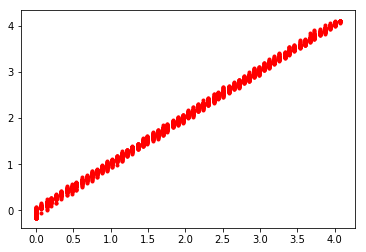

In [6]:
# Une première visualisation des resultats fait apparaître une dispersion 
# liée à la quantification de Ev qui ne correspond pas à un triangle parfait
# mais a un escalier avec des paliers bien déterminés.

plt.scatter(I_val,U_val,color='red',marker='.')

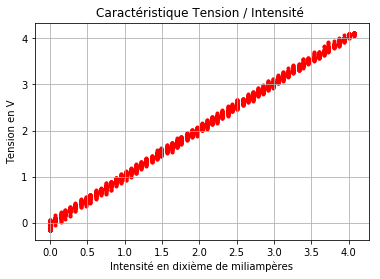

In [8]:
# Pour annoter la représentation graphique nous utilisons les données du programme
# Le cadrillage permet de faire apparaître une proportionnalité.

plt.scatter(I_val,U_val,color='red',marker='.')
plt.xlabel("Intensité en dixième de miliampères")
plt.ylabel("Tension en V")
plt.title("Caractéristique Tension / Intensité ")
plt.grid(True)

In [9]:
# Pour obtennir mes caractéristiques de la droite qui modélise la loi d'Ohm
regression = linregress(I_val,U_val)
coefDirecteur = regression[0]
ordonneeOrigine = regression[1]
coeffCorrelation = regression[2]

In [10]:
#La valeur de la résistance est donc en Ohm:
round(coefDirecteur*10000)

10141.0

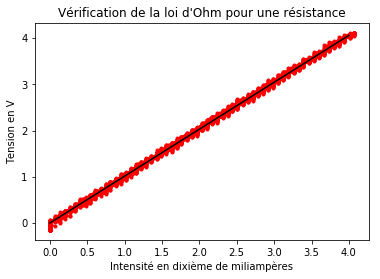

In [11]:
# Nous alons superposer les résulats de l'ajustement numérique
# obtennu en simulant la cactéristique d'un résistor idéal
# Pour tracer un segment de droite il faut que la pente corresponde
# a une valeur que le modèle prédit comme étant la résistance

plt.xlabel("Intensité en dixième de miliampères")
plt.ylabel("Tension en V")
plt.plot(I_val,U_val,color='red',marker='.')
plt.plot([0,4],[0,4*coefDirecteur],color='black',linestyle='solid')
plt.title("Vérification de la loi d'Ohm pour une résistance")
plt.show()